# TASK #1 : UNDERSTAND THE PROBLEM STATEMENT

Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Note that:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Drop column id

cardio_df = cardio_df.drop(columns= 'id')

In [5]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# since the age is given in days, we convert it into years
cardio_df['age'] = cardio_df['age']/365

In [7]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Checking the dataframe information
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [10]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Converting negative blood pressures to positive
cardio_df['ap_hi'] = cardio_df['ap_hi'].abs()
cardio_df['ap_lo'] = cardio_df['ap_lo'].abs()

In [12]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cardio_df[cardio_df['ap_hi'] > 300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,41.413699,1,160,60.0,902,60,1,1,0,0,1,0
2014,62.224658,2,167,59.0,906,0,1,1,0,0,1,0
4817,39.520548,1,168,63.0,909,60,2,1,0,0,1,0
7763,57.621918,1,175,80.0,11500,90,1,1,0,0,1,1
8915,51.698630,1,164,75.0,1420,80,2,1,0,0,1,1
9557,62.079452,1,155,87.0,701,110,1,1,0,0,1,1
13895,43.824658,1,168,72.0,1500,80,1,1,0,0,1,1
17713,61.364384,2,163,50.0,907,70,3,3,0,0,1,1
23867,44.194521,1,161,92.0,906,0,2,1,0,0,1,1
25464,43.383562,2,169,75.0,14020,80,2,1,0,0,1,1


In [14]:
# changing some values which are mistakes
cardio_df.at[9557, 'ap_hi'] = 170   
cardio_df.at[40330, 'ap_hi'] = 93
cardio_df.at[40831, 'ap_hi'] = 140

In [15]:
#Creating a custom function to sort the outliers in blood pressure column
def divide_large_number(df, col_name):    
    temp = (df[col_name] > 500) & (df[col_name] < 1000)
    temp1 = (df[col_name] > 999) & (df[col_name] < 9999)
    temp2 = df[col_name] > 9999
    df.loc[temp1, col_name] = df.loc[temp1, col_name] / 10
    df.loc[temp, col_name] = df.loc[temp, col_name] / 10
    df.loc[temp2, col_name] = df.loc[temp2, col_name] / 100
    return df[col_name]

cardio_df['ap_hi'] = divide_large_number(cardio_df,'ap_hi')
cardio_df['ap_lo'] = divide_large_number(cardio_df,'ap_lo')


In [16]:
# Taking care of missing values 
cardio_df = cardio_df.sort_values(by='ap_hi')

In [17]:
cardio_df['ap_lo'] = cardio_df['ap_lo'].replace(0, method='bfill')

In [18]:
cardio_df = cardio_df.sort_index()

In [19]:
cardio_df[cardio_df['ap_lo'] > 300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2985,55.884932,1,168,78.0,140.0,804.4,3,3,0,0,0,1
6653,53.501370,1,162,69.0,130.0,910.0,1,1,0,0,1,1
9165,52.268493,1,165,71.0,120.0,800.0,1,1,0,0,1,1
12086,58.810959,2,169,78.0,130.0,901.1,1,1,1,1,1,1
14308,50.358904,1,160,70.0,160.0,710.0,1,1,0,1,1,1
15990,39.747945,2,179,70.0,120.0,850.0,1,1,0,0,1,0
17738,53.624658,1,151,57.0,140.0,809.9,1,1,0,0,0,0
20882,52.386301,1,155,81.0,160.0,810.0,1,1,0,0,1,1
23230,54.608219,2,170,70.0,112.0,570.0,1,2,0,0,1,1
23502,54.098630,2,169,64.0,120.0,807.9,1,1,0,0,0,0


In [21]:
cardio_df['ap_hi'] = cardio_df['ap_hi'].round().astype(int)
cardio_df['ap_lo'] = cardio_df['ap_lo'].round().astype(int)

In [22]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,126.702357,81.831043,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,18.043975,15.785584,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,240.000000,980.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
cardio_df[(cardio_df['weight'] >= 10.00) & (cardio_df['weight'] <= 30.00)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
3752,42.191781,1,120,30.0,110,70,1,1,0,0,1,0
18559,49.698630,1,160,30.0,120,80,1,1,0,0,1,1
26806,63.791781,1,157,23.0,110,80,1,1,0,0,1,0
29488,55.912329,2,177,22.0,120,80,1,1,1,1,1,0
33817,59.128767,2,178,11.0,130,90,1,1,0,0,1,1
34276,40.175342,2,128,28.0,120,80,1,1,0,0,1,0
41905,58.449315,1,143,30.0,103,61,2,1,0,0,1,0
57858,51.517808,2,165,10.0,180,110,2,2,0,0,1,1
60188,59.876712,1,162,21.0,120,80,2,1,0,0,1,1
60699,51.712329,1,171,29.0,110,70,2,1,0,0,1,1


In [24]:
cardio_df[cardio_df['weight'] >= 180.00]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,45.931507,1,186,200.0,130,70,1,1,0,0,0,0
4743,47.172603,2,176,180.0,140,90,1,1,0,0,1,1
36780,53.780822,1,161,181.0,180,110,2,1,0,0,1,1
45378,47.720548,2,190,180.0,140,80,2,2,0,0,1,1
50413,41.416438,2,180,200.0,150,90,1,1,0,0,1,1
60592,51.986301,2,180,180.0,140,100,3,1,0,0,1,1
61285,57.367123,2,180,183.0,110,80,3,3,0,1,1,1
61362,45.520548,2,196,180.0,130,80,3,1,0,0,1,1


In [25]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int32  
 5   ap_lo        70000 non-null  int32  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 6.4 MB


In [26]:
cardio_df.to_csv('cleaned_cardio_data.csv')

# TASK #4: VISUALIZE DATASET

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

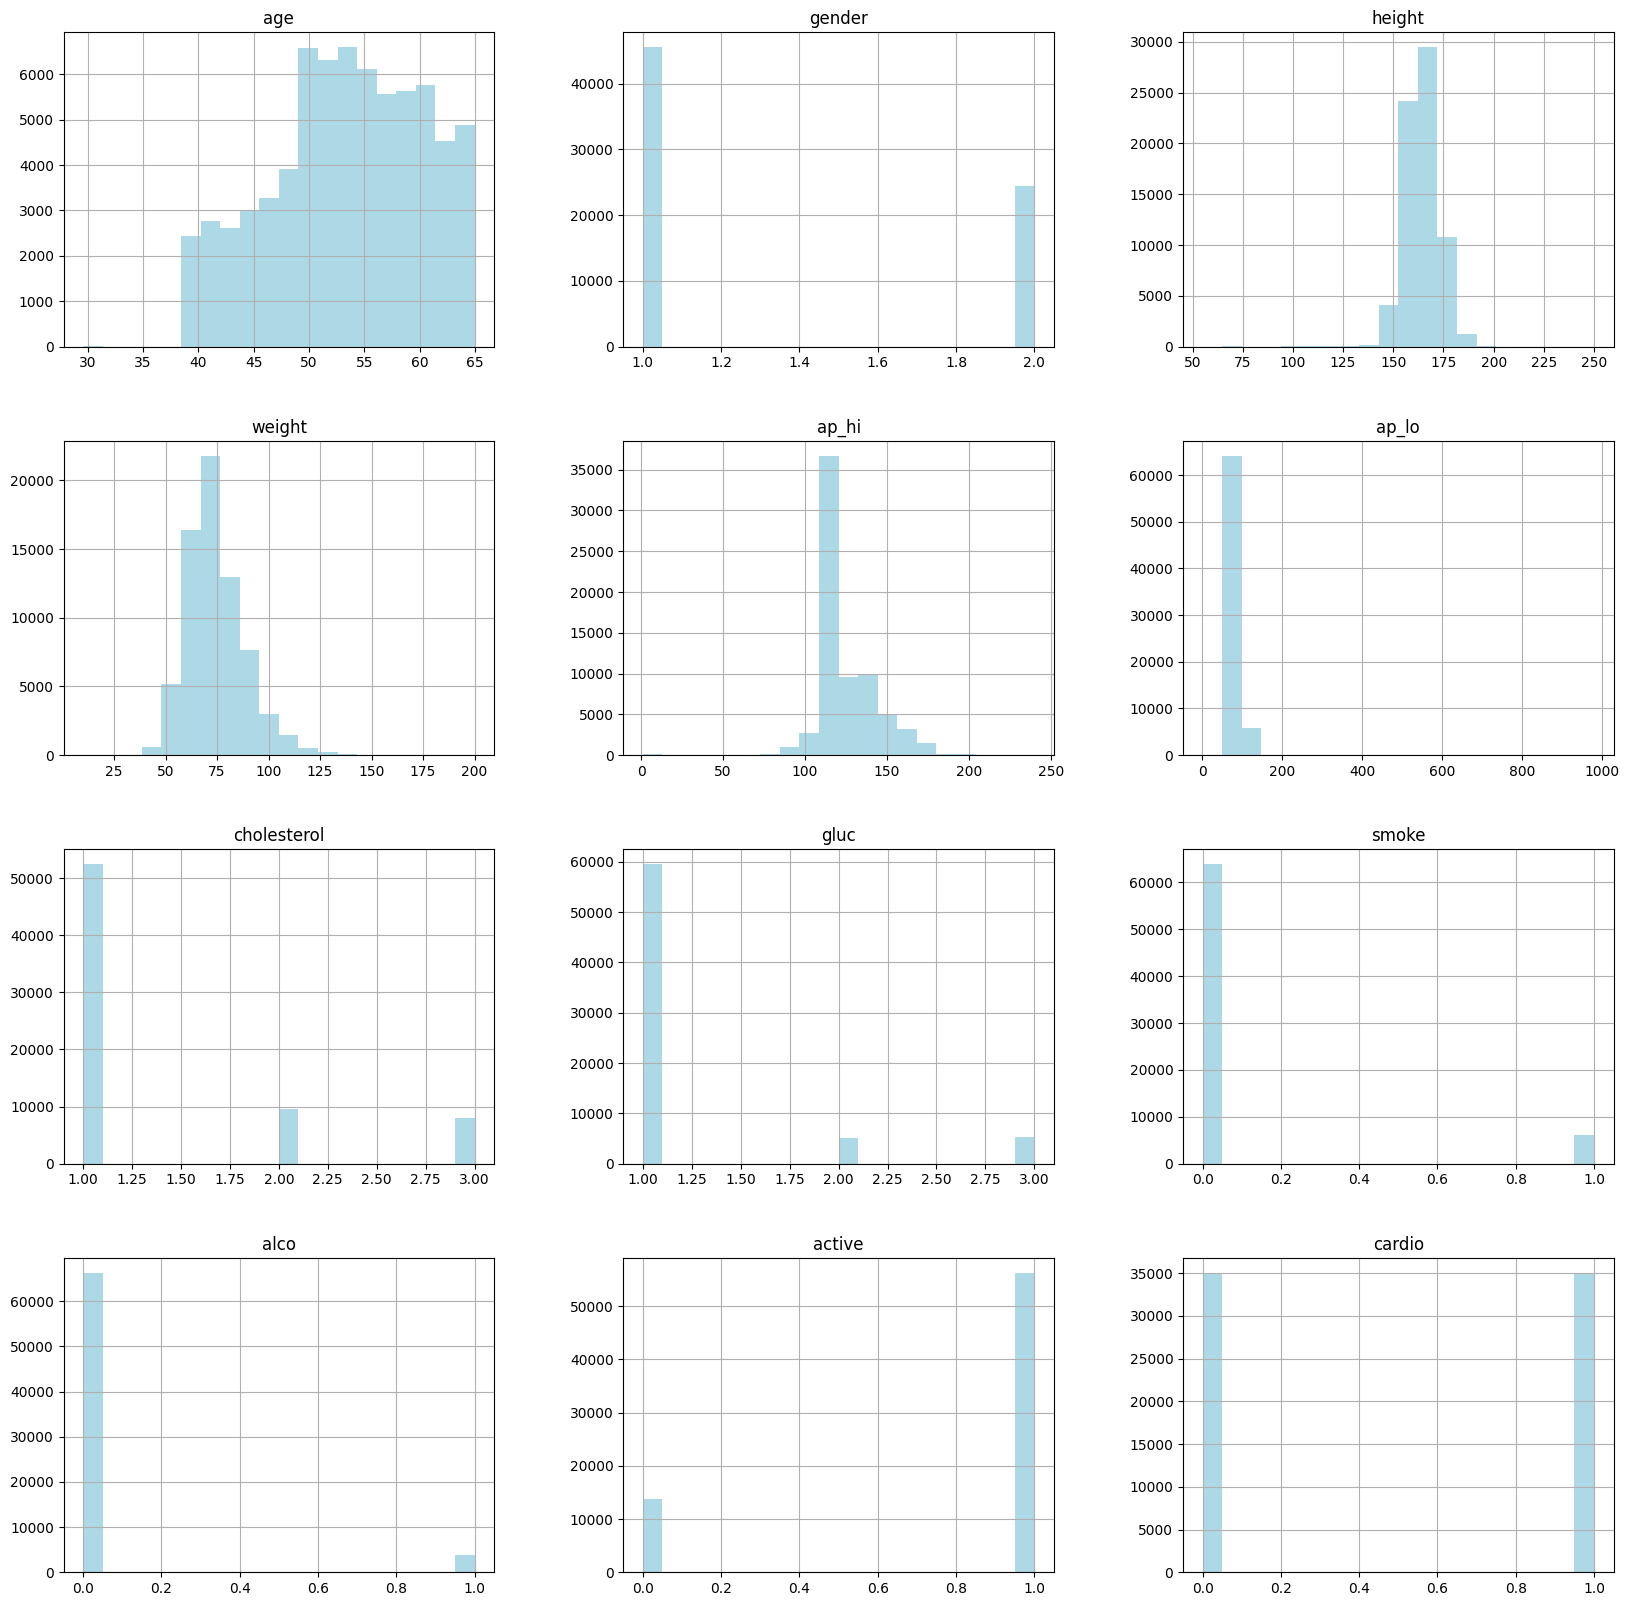

In [27]:
cardio_df.hist(bins = 20, figsize = (20,20), color = 'lightblue')

<Axes: >

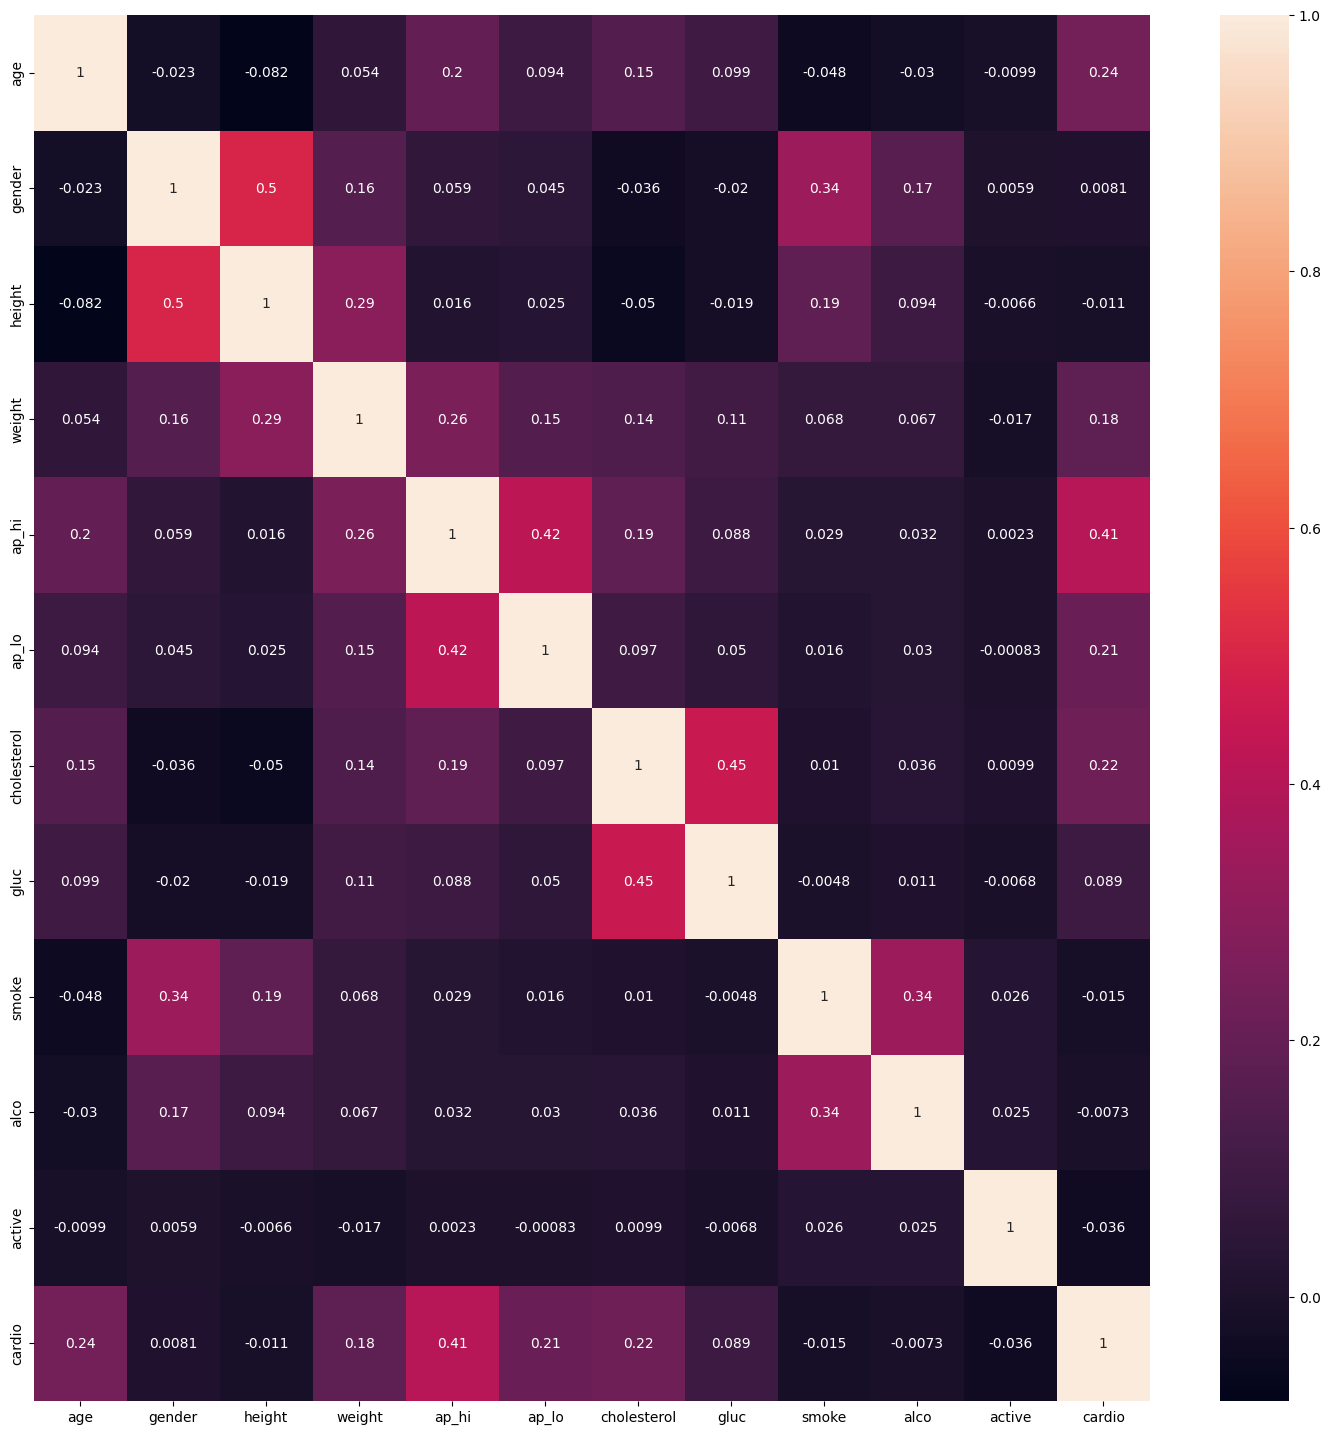

In [28]:
corr_matrix = cardio_df.corr()
plt.figure(figsize= (18,18))
sns.heatmap(corr_matrix, annot = True)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [29]:
# split the dataframe into target and features

df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])

In [30]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [31]:
df_final.shape

(70000, 11)

In [32]:
df_target.shape

(70000,)

In [33]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)

In [34]:
X_train.shape

(56000, 11)

In [35]:
y_train.shape

(56000,)

In [36]:
X_test.shape

(14000, 11)

In [37]:
X_test.shape

(14000, 11)

# TASK #6: TRAIN AND TEST XGBOOST

In [39]:
from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
# make predictions on test data

predict = model.predict(X_test)

In [41]:
predict

array([1, 0, 1, ..., 0, 0, 0])

<Axes: >

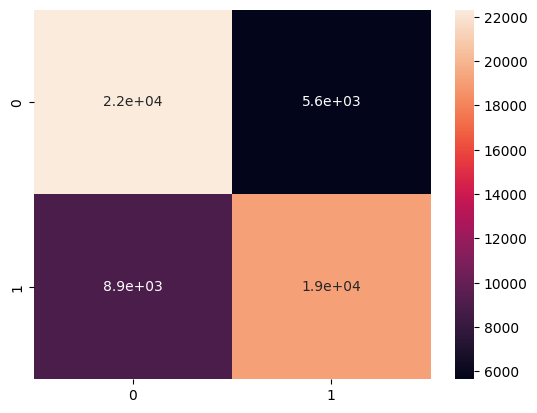

In [42]:
# Assess trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

In [43]:
# print metrics for training dataset

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.7721125509668564
Recall = 0.6822186552523631
Accuracy = 0.7401071428571429


In [44]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7522252791713869
Recall = 0.6693548387096774
Accuracy = 0.7266428571428571


<Axes: >

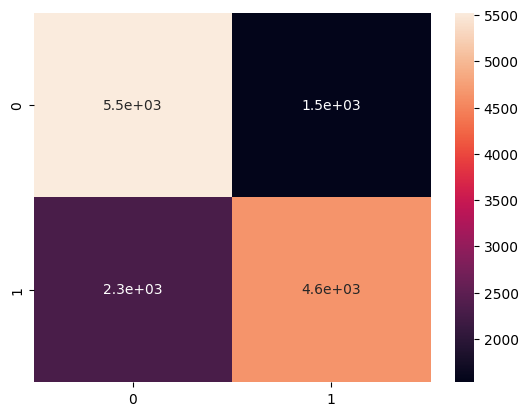

In [45]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

# TASK #7: GridSearch on XGBoost Classifier

In [46]:
param_grid = {
        'gamma': [1, 5, 10],   # regularization parameter 
        'subsample': [0.6, 1.0, 1.4], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 1.0, 1.4], # number of columns used by each tree
        'max_depth': [5, 6, 7] # depth of each tree
        }

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=300, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.736 total time=   8.1s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.740 total time=   8.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.744 total time=   8.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.735 total time=   7.9s
[CV 5/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=0.6;, score=0.734 total time=   8.7s
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.735 total time=   9.6s
[CV 2/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.740 total time=   7.6s
[CV 3/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.744 total time=   6.9s
[CV 4/5] END colsample_bytree=0.6, gamma=1, max_depth=5, subsample=1.0;, score=0.735 total time=   7.2s
[C

[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=0.6;, score=0.735 total time=  11.1s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.0;, score=0.734 total time=  10.2s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.0;, score=0.741 total time=  10.1s
[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.0;, score=0.744 total time=  10.1s
[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.0;, score=0.734 total time=  10.4s
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.0;, score=0.735 total time=  10.2s
[CV 1/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.4;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.4;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.4;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=7, subsample=1.4

In [ ]:
y_predict_optim = grid.predict(X_test)

In [ ]:
y_predict_optim

In [ ]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))